In [2]:
import pandas as pd

In [5]:
df=pd.read_csv("/winequality-red.csv")

In [6]:
import matplotlib.pyplot as plt

In [7]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

from sklearn.tree import plot_tree

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [8]:
# Function for data preprocessing
def preprocess_data(data, target_column):
    # Separating features and target variable
    X = data.drop(columns=[target_column])
    y = data[target_column]
    print(X)
    print(y)
    # Handling missing values
    numerical_cols = X.select_dtypes(include=['number']).columns
    categorical_cols = X.select_dtypes(include=['object']).columns
    numerical_transformer = SimpleImputer(strategy='mean')  # Impute missing values with mean
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
        ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical variables
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Preprocessing pipeline
    preprocess_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

    # Preprocessing training and testing data
    X_train_preprocessed = preprocess_pipeline.fit_transform(X_train)
    X_test_preprocessed = preprocess_pipeline.transform(X_test)

    return X_train_preprocessed, X_test_preprocessed, y_train, y_test




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [9]:
preprocess_data(df, target_column="quality")

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

(array([[ 8.7 ,  0.69,  0.31, ...,  3.48,  0.74, 11.6 ],
        [ 6.1 ,  0.21,  0.4 , ...,  3.25,  0.59, 11.9 ],
        [10.9 ,  0.39,  0.47, ...,  3.3 ,  0.75,  9.8 ],
        ...,
        [ 7.2 ,  0.62,  0.06, ...,  3.51,  0.54,  9.5 ],
        [ 7.9 ,  0.2 ,  0.35, ...,  3.32,  0.8 , 11.9 ],
        [ 5.8 ,  0.29,  0.26, ...,  3.39,  0.54, 13.5 ]]),
 array([[ 7.7  ,  0.56 ,  0.08 , ...,  3.24 ,  0.66 ,  9.6  ],
        [ 7.8  ,  0.5  ,  0.17 , ...,  3.39 ,  0.48 ,  9.5  ],
        [10.7  ,  0.67 ,  0.22 , ...,  3.28 ,  0.98 ,  9.9  ],
        ...,
        [ 8.3  ,  0.6  ,  0.25 , ...,  3.15 ,  0.53 ,  9.8  ],
        [ 8.8  ,  0.27 ,  0.39 , ...,  3.15 ,  0.69 , 11.2  ],
        [ 9.1  ,  0.765,  0.04 , ...,  3.29 ,  0.54 ,  9.7  ]]),
 493     6
 354     6
 342     6
 834     5
 705     5
        ..
 1130    6
 1294    6
 860     5
 1459    7
 1126    6
 Name: quality, Length: 1279, dtype: int64,
 803     6
 124     5
 350     6
 682     5
 1326    6
        ..
 1259    6
 1295   

In [10]:
# Function for building the decision tree classifier
def build_decision_tree(X_train, y_train, max_depth=16):
    classifier = DecisionTreeClassifier()
    classifier.fit(X_train, y_train)
    return(classifier)

In [11]:
X_train,X_test,y_train,y_test=preprocess_data(df, target_column="quality")

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [12]:
classifier = build_decision_tree(X_test,y_test)

In [13]:
# Function for evaluating the model
def evaluate_model(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred)


    cm = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
    disp.plot()
    plt.plot()
    return accuracy, report, confusion_mat

(1.0,
 '              precision    recall  f1-score   support\n\n           3       1.00      1.00      1.00         1\n           4       1.00      1.00      1.00        10\n           5       1.00      1.00      1.00       130\n           6       1.00      1.00      1.00       132\n           7       1.00      1.00      1.00        42\n           8       1.00      1.00      1.00         5\n\n    accuracy                           1.00       320\n   macro avg       1.00      1.00      1.00       320\nweighted avg       1.00      1.00      1.00       320\n',
 array([[  1,   0,   0,   0,   0,   0],
        [  0,  10,   0,   0,   0,   0],
        [  0,   0, 130,   0,   0,   0],
        [  0,   0,   0, 132,   0,   0],
        [  0,   0,   0,   0,  42,   0],
        [  0,   0,   0,   0,   0,   5]]))

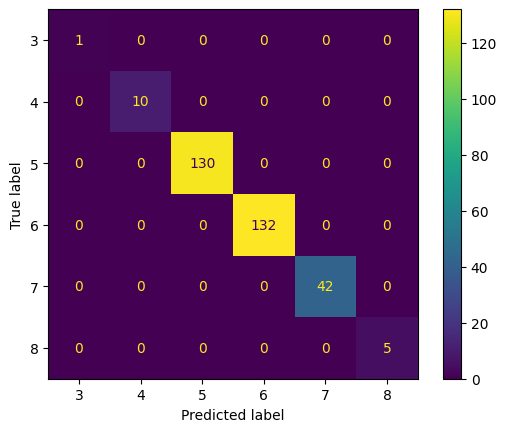

In [14]:
evaluate_model(classifier, X_test, y_test)

In [15]:
def visualize_tree(classifier, feature_names):
    plt.figure(figsize=(15, 10))
    plot_tree(classifier, feature_names=feature_names, class_names=classifier.classes_, filled=True)
    plt.show()

TypeError: can only concatenate str (not "numpy.int64") to str

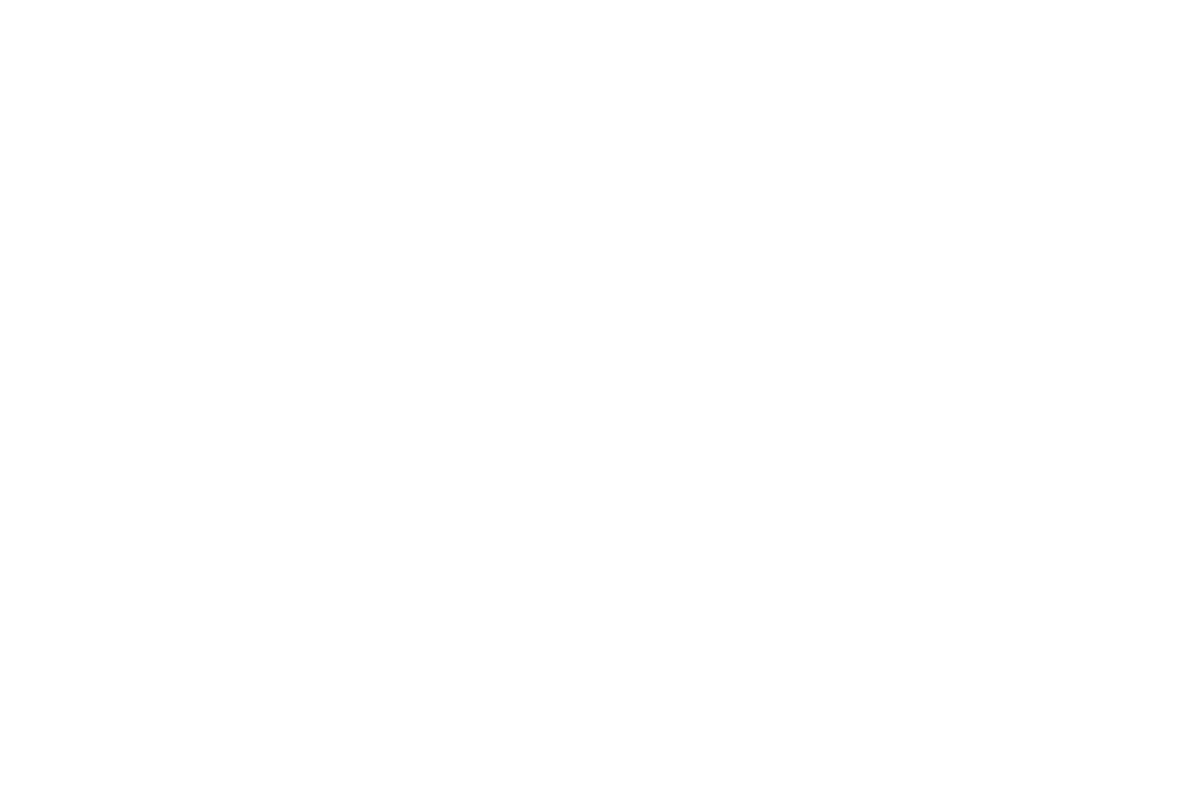

In [16]:
visualize_tree(classifier, df.columns[:-1])